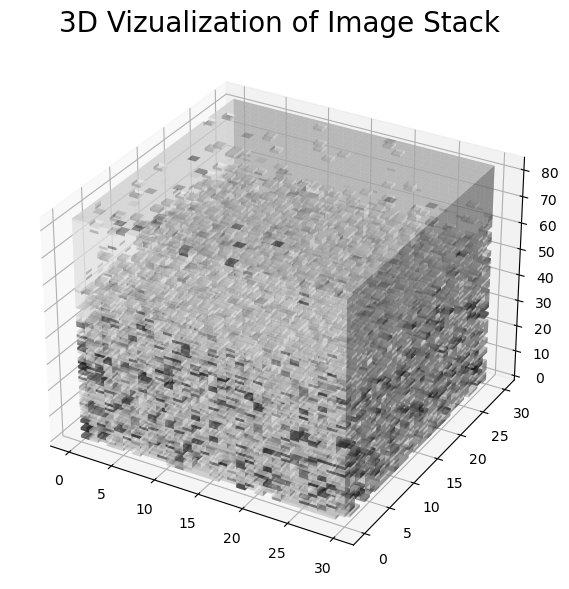

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import data

MAX_SIZE = (30, 30) #define max size of image for memory purposes
img = Image.open('images/combined_image (1).tif')

images = []
for i in range(img.n_frames):
    img.seek(i)

    img_small = img.resize(MAX_SIZE)
    if len(img_small.size) == 2:   #Convert to RGB if grayscale
        img_small = img_small.convert('RGB')
   
    images.append(np.array(img_small))

images = np.array(images)

colors = images / 255 # normalize colors

r, g, b = images[:,:,:,0], images[:,:,:,1], images[:,:,:,2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')  

gray = np.rot90(gray, k=1, axes=(0, 2)) #rotate into position takes 3 rotations
colors = np.rot90(colors, k=1, axes=(0, 2))

gray = np.rot90(gray, k=2, axes=(0, 1))
colors = np.rot90(colors, k=2, axes=(0, 1))

gray = np.flip(gray, axis=2) #flip because bottom image first
colors = np.flip(colors, axis=2)

dim = np.shape(colors)

transparent = np.zeros((dim[0], dim[1], dim[2],1)) #add transparency layer
transparent += 0.5

colors = np.append(colors,transparent,axis=3)

ax.voxels(gray>25, facecolors=colors) #define cutoff, cut out black/very dark voxels

ax.set_title('3D Vizualization of Image Stack',fontsize=20)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 


plt.show()